# OSM Processing

## Import Packages

In [1]:
import os
import geopandas as gpd
import pandas as pd
from bokeh_plots import *

Loading BokehJS ...

# Set Directory:

In [2]:
directory = r"C:/Users/tpassmore6/Documents/GitHub/BikewaySimDev/base_shapefiles/osm"
os.chdir(directory)

## Import custom modules

In [3]:
from osm_dwnld import * #contains functions for downloaded data from OSMnx and Overpass API

## Choose Study Area

<AxesSubplot:>

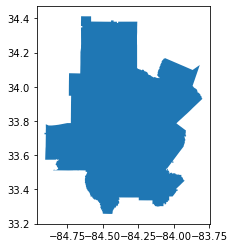

In [4]:
#give filepath of a shapefile/geojson/geopackage
#studyareafp = r'C:/Users/tpassmore6/Documents/GitHub/BikewaySimDev/base_shapefiles/bikewaysim_study_area/bikewaysim_study_area.shp'
#studyareafp = r'C:/Users/tpassmore6/Documents/GitHub/BikewaySimDev/base_shapefiles/coa/Atlanta_City_Limits.shp'
studyareafp = r'C:/Users/tpassmore6/Documents/GitHub/BikewaySimDev/base_shapefiles/arc/arc_bounds.shp'

#give study area a name for exporting
#studyareaname = 'bikewaysim'
#studyareaname = 'coa'
studyareaname = 'arc'

#read in study area polygon and convert to WGS 84
gdf = gpd.read_file(studyareafp).to_crs(epsg=4326)
gdf.plot()

## Download OSM from OSMnx
### More info about OSMnx: https://geoffboeing.com/2016/11/osmnx-python-street-networks/
### OSMnx documentation: https://osmnx.readthedocs.io/en/stable/index.html

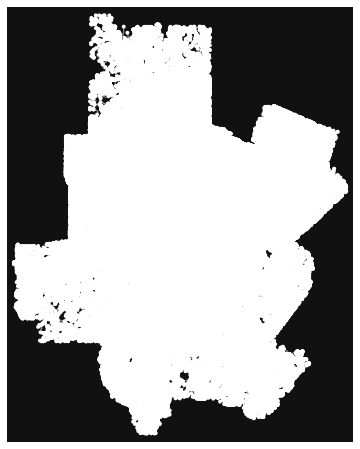

In [5]:
osmnx_nodes, osmnx_links = download_osmnx(gdf)

## Download OSM as JSON from Overpass API 

In [6]:
overpass_links = overpass_download(gdf)

The bounding box is 33.25651732623962, -84.91106335095031, 34.41259656614879, -83.79890104122266


C:\Users\tpassmore6\Documents\GitHub\BikewaySimDev\base_shapefiles\osm\osm_dwnld.py:77: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace(r'tags.', '')


## Join attribute data

In [7]:
complete_dataset = pd.merge(osmnx_links, overpass_links, left_on=('osmid'), right_on=('id'), how = 'inner')
display(complete_dataset)

,osmid,A,B,geometry,type,type,id,destination,highway,oneway,...,placement:backward:end,placement:backward:start,height,crossing_ref,placement:both_ways,placement:end,placement:start,maxspeed:conditional,lat,lon
0,9106163,67358015,67358019,"LINESTRING (-84.32369 33.63876, -84.32368 33.6...",way,NaN,9106163,NaN,residential,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9106163,67358019,67358022,"LINESTRING (-84.32372 33.63777, -84.32369 33.6...",way,NaN,9106163,NaN,residential,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9106163,67358022,67358027,"LINESTRING (-84.32373 33.63735, -84.32372 33.6...",way,NaN,9106163,NaN,residential,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9106163,67358027,67358031,"LINESTRING (-84.32374 33.63620, -84.32372 33.6...",way,NaN,9106163,NaN,residential,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9111908,67358015,783782570,"LINESTRING (-84.32218 33.63973, -84.32279 33.6...",way,NaN,9111908,NaN,tertiary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899666,983213755,9091181733,9091181740,"LINESTRING (-84.63249 34.24253, -84.63238 34.2...",way,NaN,983213755,NaN,service,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899667,983222476,9091267669,9091267670,"LINESTRING (-84.63811 34.10762, -84.63859 34.1...",way,NaN,983222476,NaN,service,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899668,983221609,9091270150,9091270151,"LINESTRING (-84.56005 34.26393, -84.56023 34.2...",way,NaN,983221609,NaN,service,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899669,983221610,9091270152,9091270156,"LINESTRING (-84.55820 34.26486, -84.55812 34.2...",way,NaN,983221610,NaN,service,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Make interactive plot

In [ ]:
#create list of tuple for interactive map
lable_tuples = [
    #("Label","@variablename")
    ("Name", "@name"),
    ("Facility Type", "@highway")
]

p = plot_bokeh_map(complete_dataset, lable_tuples, 'OSM')
show(p)
#save('dir') use to save html plot if desired

## Project to desired CRS

In [8]:
osmnx_links.to_crs(epsg='2240', inplace = True)
osmnx_nodes.to_crs(epsg='2240', inplace = True)
complete_dataset.to_crs(epsg='2240', inplace = True)

## Export

In [9]:
osmnx_links.to_file(f'{studyareaname}_links.geojson', driver = 'GeoJSON')
osmnx_nodes.to_file(f'{studyareaname}_nodes.geojson', driver = 'GeoJSON')
complete_dataset.to_file(f'{studyareaname}_links_attr.geojson', driver = 'GeoJSON')